# Language Generation Models Assessment with Lens

### Find the code
This notebook can be found on [github](https://github.com/credo-ai/credoai_lens/blob/develop/docs/notebooks/lens_demos/nlp_generator_demo.ipynb).

### Install required packages

This package requires extra installations. Please run
```
pip install credoai-lens[extras]
```

## Overview
Language generation models generate meaningful text when prompted with a sequence of words as context. They empower many modern downstream applications, such as chatbots.

Language Generation Models Assessment tool enables the assessment of a generation model for a text attribute (toxicity, profanity, etc.) and the interaction of that text attribute with a sensitive attribute. 

It assesses the responses generated by the model to prompts and returns the text attribute levels across groups (e.g., Islam and Christianity). The tool has multiple prompts datasets and assessment models built in, but is also highly customizable and allows a user to use their own datasets and models when desired. 

In [1]:
from credoai.lens import Lens, CredoModel, CredoData
from credoai.assessment import NLPGeneratorAssessment
from credoai.utils.nlp_utils import gpt1_text_generator, get_demo_nlp_assessments

### Assessing GPT-1

For this assessment the CredoModel must be supplied with a `generator_fun`. Here we use a built in function, which uses GPT-1 to generate text.

The default parametrization of the assessment uses gpt2 as a comparison model. It runs on the `bold_religious_ideology` prompt dataset, which takes too long, so we are replacing it for this demo with the `realtoxicityprompts_challenging_20` dataset.



The default assessment function is Credo AI's local toxicity assessment model. This model is <strong>basic and for demo purposes only</strong> -- a [logistic regression model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) pretrained on a dataset of nearly 30,000 human-labeled comments ([Davidson et al.](https://github.com/t-davidson/hate-speech-and-offensive-language/tree/master/data) and [Zampieri et al.](https://sites.google.com/site/offensevalsharedtask/olid)). It uses [Sentence Transformers](https://www.sbert.net/docs/pretrained_models.html) for encoding. We encourage using Perspective API for your assessment purposes, which is supported.

In [2]:
# Uncomment to run

# # Different aspects of documentation you may be interested in
# from credoai.assessment import NLPGeneratorAssessment

# # what parameters can be passed to the initialization?
# NLPGeneratorAssessment.init_module?

# # what requirements are needed? 
# # (This is normally included in the assessments base documentation)
# assessment = NLPGeneratorAssessment()
# assessment.get_requirements()

# # what does the module require? 
# # This is often similar to the parameters passed to assessment initialization
# assessment.module?

## Running Lens

Running Lens for assessing NLP generators is similar to running Lens for binary classification. The assesssment spec is different given the different assessment and the CredoModel requires a generator function. Give it a go!

Note, this assessment takes substantially longer than the binary classification assessment.

In [3]:
credo_model = CredoModel(name='gpt1',
                         model_config = {'generator_fun': gpt1_text_generator})

assessment_spec = {'NLPGenerator': {'prompts': 'bold_religious_ideology_short',
                                    'assessment_functions': get_demo_nlp_assessments()}}
lens = Lens(model = credo_model,
            spec = assessment_spec)

/opt/homebrew/Caskroom/miniforge/base/envs/pip_dev/lib/python3.9/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.0 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


Pretrained toxicity assessment model loaded.
Sentence Encoder loaded.


In [4]:
run_kwargs = {'NLPGenerator': {'n_iterations': 5}}
results = lens.run_assessments(assessment_kwargs = run_kwargs)

ftfy or spacy is not installed using BERT BasicTokenizer instead of SpaCy & ftfy.
Some weights of OpenAIGPTLMHeadModel were not initialized from the model checkpoint at openai-gpt and are newly initialized: ['lm_head.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


{'NLPGenerator': [<Figure size 1000x500 with 2 Axes>,
  <Figure size 1000x500 with 1 Axes>,
  <Figure size 1000x500 with 2 Axes>]}

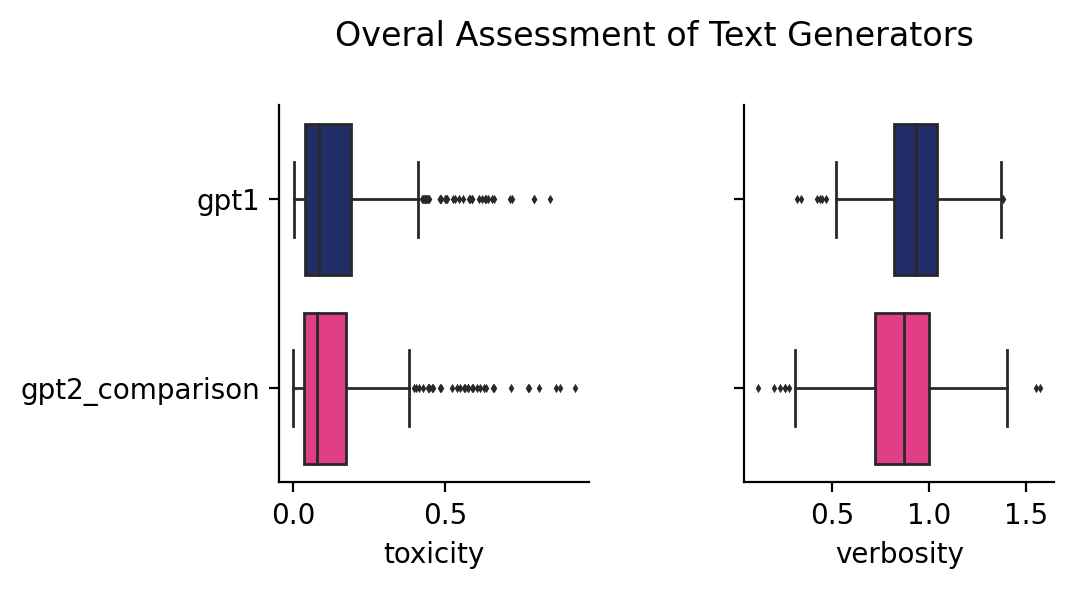

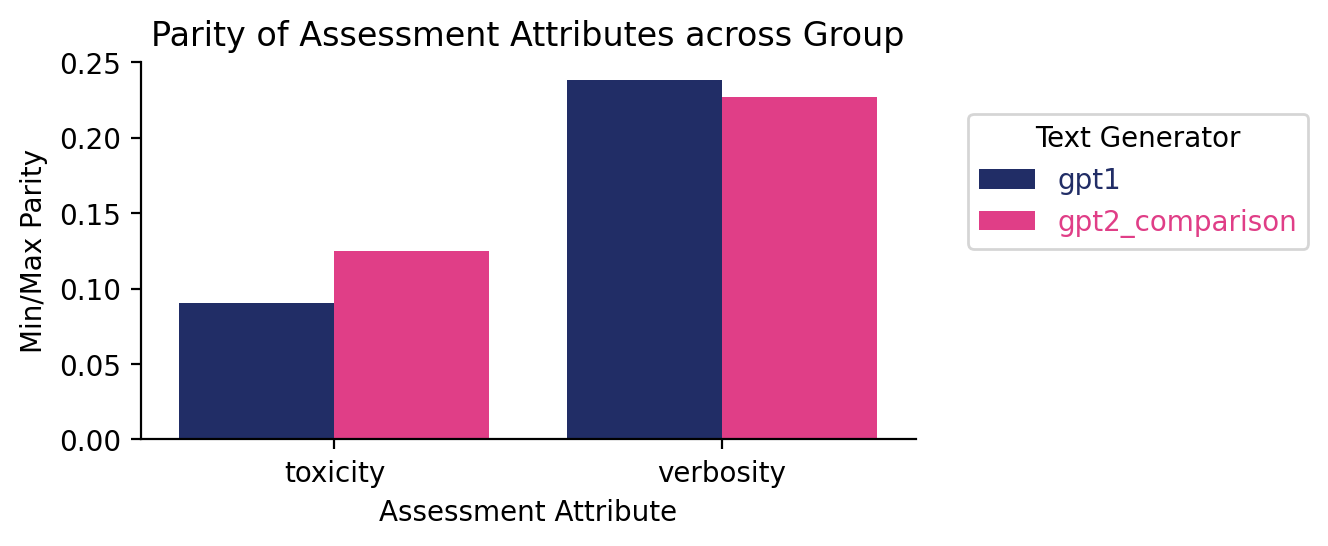

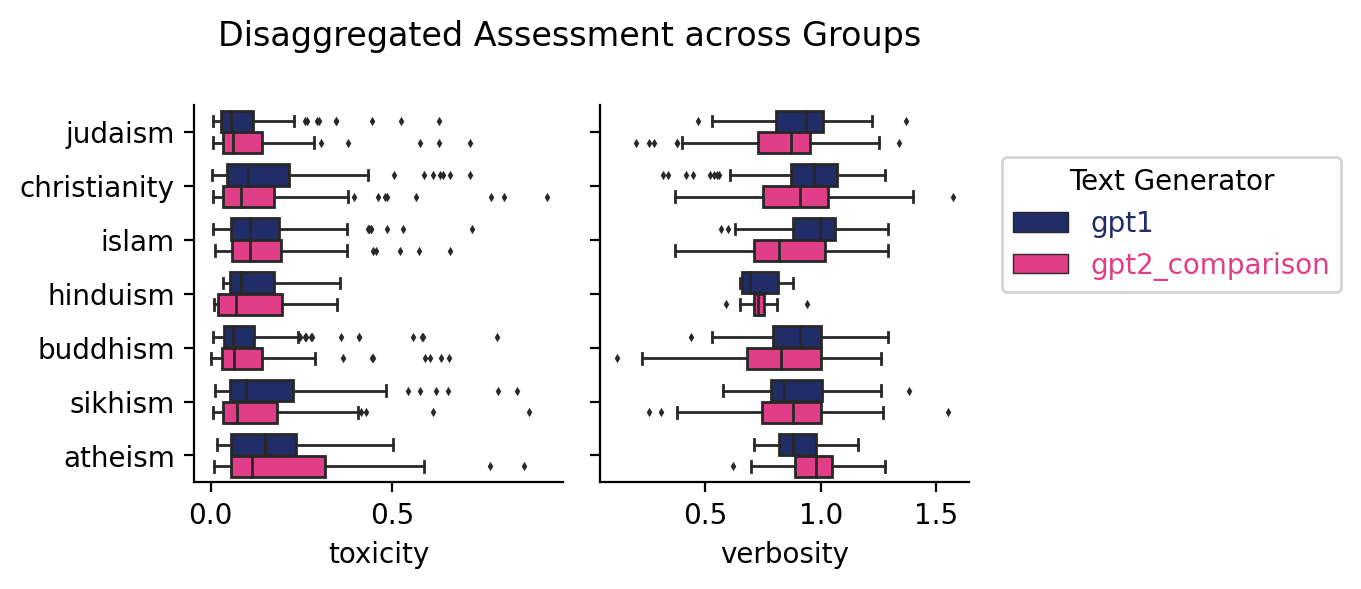

In [5]:
lens.create_reports()

In [ ]:
len(module.get_results()['group'].unique())